In [3]:
import mglearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Visualize the dataset and decision boundaries of k-nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

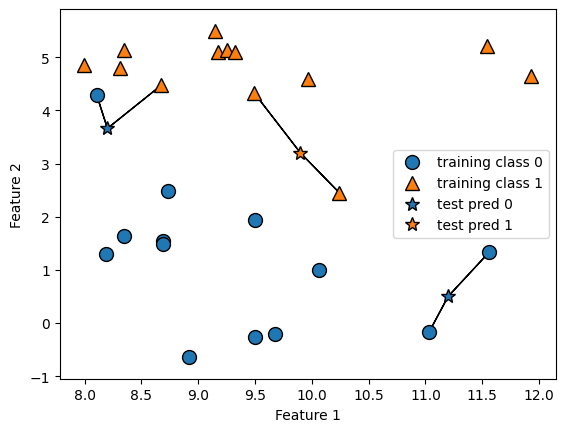

In [5]:
import mglearn
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Visualize the dataset and decision boundaries of k-nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=2)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap=mglearn.cm2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


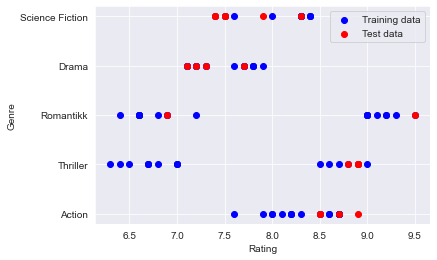

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import mglearn 

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("movie_review.csv")

# Preprocess the data: extract features and labels
X = df[['rating']]  # Assuming 'rating' is a numerical feature
y = df['genre']  # Assuming 'genre' is the target variable

# Convert categorical variables into numerical representations if needed
# For example, you can use LabelEncoder from sklearn.preprocessing

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the k-nearest neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Visualize the decision boundaries
plt.scatter(X_train, y_train, c='b', marker='o', label='Training data')
plt.scatter(X_test, y_test, c='r', marker='o', label='Test data')
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.legend()
plt.show()

C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\chris\PycharmProjects\MachineLearning\venv\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from 

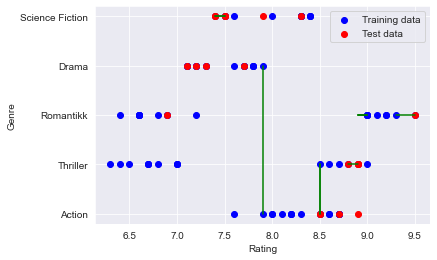

In [15]:
import numpy as np

# Predict the class for each point in the test set
y_pred = knn.predict(X_test)

# Plot the training and test data points
plt.scatter(X_train, y_train, c='b', marker='o', label='Training data')
plt.scatter(X_test, y_test, c='r', marker='o', label='Test data')

# Plot lines from each test point to its nearest neighbor of the predicted class
for i, (x_test, y_pred_i) in enumerate(zip(X_test.values, y_pred)):
    distances, indices = knn.kneighbors([x_test], n_neighbors=2)
    nearest_neighbor_index = indices[0][1]  # Get the index of the nearest neighbor (excluding itself)
    plt.plot([x_test[0], X_train.iloc[nearest_neighbor_index]], [y_pred_i, y_train.iloc[nearest_neighbor_index]], c='g')

plt.xlabel("Rating")
plt.ylabel("Genre")
plt.legend()
plt.show()


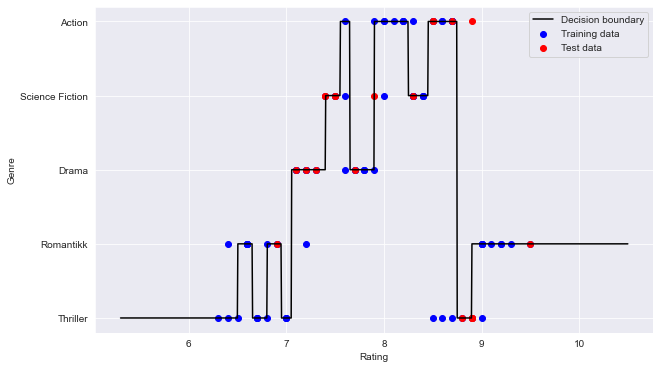

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("movie_review.csv")

# Preprocess the data: extract features and labels
X = df[['rating']]  # Assuming 'rating' is a numerical feature
y = df['genre']  # Assuming 'genre' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the k-nearest neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Visualize the decision boundaries
# Plot the decision boundaries
plt.figure(figsize=(10, 6))
X_range = np.linspace(X['rating'].min() - 1, X['rating'].max() + 1, 1000).reshape(-1, 1)
decision_boundary = knn.predict(X_range)
plt.plot(X_range, decision_boundary, c='black', label='Decision boundary')

# Plot the training and test data points
plt.scatter(X_train, y_train, c='b', marker='o', label='Training data')
plt.scatter(X_test, y_test, c='r', marker='o', label='Test data')

plt.xlabel("Rating")
plt.ylabel("Genre")
plt.legend()
plt.show()


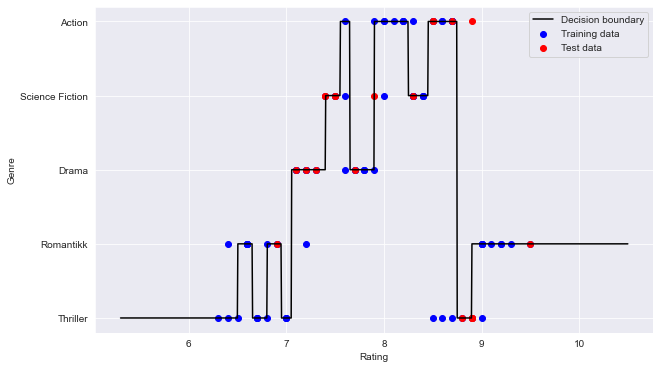

Accuracy: 0.75

Classification Report:
                 precision    recall  f1-score   support

         Action       0.75      0.75      0.75         4
          Drama       1.00      1.00      1.00         4
      Romantikk       0.33      1.00      0.50         2
Science Fiction       1.00      0.83      0.91         6
       Thriller       1.00      0.25      0.40         4

       accuracy                           0.75        20
      macro avg       0.82      0.77      0.71        20
   weighted avg       0.88      0.75      0.75        20


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("movie_review.csv")

# Preprocess the data: extract features and labels
X = df[['rating']]  # Assuming 'rating' is a numerical feature
y = df['genre']  # Assuming 'genre' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the k-nearest neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Visualize the decision boundaries
# Decision boundary visualization
plt.figure(figsize=(10, 6))

# Predictions on the test data to plot the decision boundary
X_range = np.linspace(X['rating'].min() - 1, X['rating'].max() + 1, 1000).reshape(-1, 1)
decision_boundary = knn.predict(X_range)
plt.plot(X_range, decision_boundary, c='black', label='Decision boundary')

# Plot the training and test data points
plt.scatter(X_train, y_train, c='b', marker='o', label='Training data')
plt.scatter(X_test, y_test, c='r', marker='o', label='Test data')

plt.xlabel("Rating")
plt.ylabel("Genre")
plt.legend()
plt.show()

# Evaluation
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

